# LBP (Local Binary Pattern)影像處理範例

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2F1687-6180-2014-182/MediaObjects/13634_2014_Article_725_Fig2_HTML.jpg" width=640></img><br>


In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### 定義LBP函式

In [2]:
#dist_img=lbp(src_img)
#dist_img:輸出影像
#src_img:輸入影像(只接受灰階圖)

def lbp(img):
    assert(len(img.shape) == 2) # 只接受灰階影像
    ret = np.zeros_like(img)
    
    img = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_REPLICATE)
    
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            center = img[y][x]
            pixel = 0
            pixel |= (img[y - 1][x - 1] >= center) << 0
            pixel |= (img[y - 1][x + 0] >= center) << 1
            pixel |= (img[y - 1][x + 1] >= center) << 2
            pixel |= (img[y + 0][x + 1] >= center) << 3
            pixel |= (img[y + 1][x + 1] >= center) << 4
            pixel |= (img[y + 1][x + 0] >= center) << 5
            pixel |= (img[y + 1][x - 1] >= center) << 6
            pixel |= (img[y + 0][x - 1] >= center) << 7
            
            ret[y-1][x-1] = pixel
    return ret

### 定義showHist函式，在matplotlib上show<span style="color:red">圖表</span>

In [3]:
#定義showHist函式，可以用matplotlib來show圖表
#showHist(hist,title_name,x_label='Bins',y_label='# of Pixels',sub_row=1,sub_col=1,sub_num=1)
#hist:要show的圖表
#tiltle_name:圖表的標題
#x_label:x軸的標題
#x_label:y軸的標題
#sub_row:對應到 plt.subplot中的 row參數，預設為 1
#sub_col:對應到 plt.subplot中的 col參數，預設為 1
#sub_num:對應到 plt.subplot中的 plotNum參數，預設為 1
#y_limit:為x軸最大值，預設為 None。

def showHist(hist,title_name="",x_label='Bins',y_label='# of Pixels',sub_row=1,sub_col=1,sub_num=1,y_limit=None):
    plt.subplot(sub_row,sub_col,sub_num)
    #hist[255]=0
    plt.plot(hist)
    #plt.ylim([0, 2500])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_name)
    plt.xlim([0, len(hist)])
    if y_limit!=None:
        plt.ylim([0, y_limit])




### 定義showImage函式，在matplotlib來show<span style="color:red">圖</span>

In [4]:
#定義showImage函式，可以用matplotlib來show圖
#showImage(image,title_name,sub_row=1,sub_col=1,sub_num=1)
#image:要show的圖
#tiltle_name:圖的標題
#sub_row:對應到 plt.subplot中的 row參數，預設為 1
#sub_col:對應到 plt.subplot中的 col參數，預設為 1
#sub_num:對應到 plt.subplot中的 plotNum參數，預設為 1

def showImage(image,title_name="",sub_row=1,sub_col=1,sub_num=1):
    '''
    在jupyter中使用matplotlib直接顯示圖片在記事本中
    ''' 
    plt.subplot(sub_row,sub_col,sub_num)  
    plt.title(title_name)
    

    # OpenCV的彩色影像 需轉成RGB順序
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.axis('off') 
        plt.imshow(image)
    # OpenCV的灰階影像 需要特別調整 plt.imshow 的參數
    if len(image.shape) == 2:
        plt.axis('off') 
        plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    
    # OpenCV的透明像素點的彩色影像 需轉成RGB順序
    if len(image.shape) == 3 and image.shape[2] == 4:
        image = cv.cvtColor(image, cv.COLOR_BGRA2RGB)
        plt.axis('off') 
        plt.imshow(image)


## __1.__ 首先分別載入`./img`裡的lenna.png


In [5]:
ori_img=cv.imread('./img/Lenna.png')

## __2.__ 接下來分別對這張做灰階轉換後再做 __lbp__

In [6]:
gray_img=cv.cvtColor(ori_img,cv.COLOR_BGR2GRAY)
lbp_gray_img=lbp(gray_img)

## __3.__ 將做好的lbp圖做成直方圖並比較結果

In [7]:
lbp_gray_hist = cv.calcHist([lbp_gray_img], [0], None, [256], [0, 256])


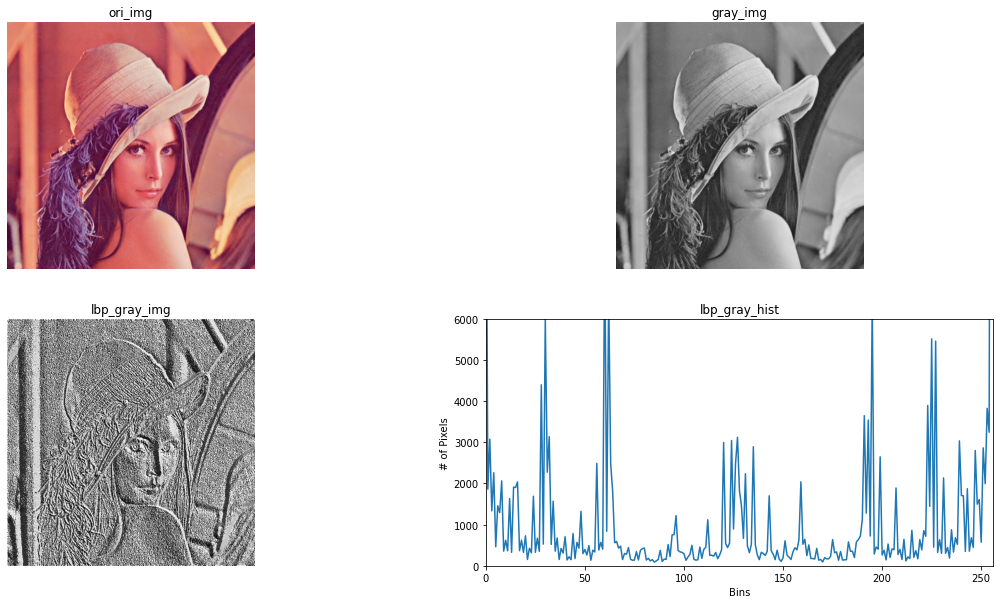

In [8]:
plt.figure(figsize=(20,10))

y_limit=6000
showImage(ori_img,'ori_img',sub_row=2,sub_col=2,sub_num=1)
showImage(gray_img,'gray_img',sub_row=2,sub_col=2,sub_num=2)
showImage(lbp_gray_img,'lbp_gray_img',sub_row=2,sub_col=2,sub_num=3)
showHist(lbp_gray_hist,'lbp_gray_hist',sub_row=2,sub_col=2,sub_num=4,y_limit=y_limit)
